# Linear Regression Assignment 
## Bike-Sharing System

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bshare = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bshare dataframe

In [5]:
bshare.shape

(730, 16)

In [6]:
# check the column info of the dataset
bshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- There is no null value in any columns.

In [7]:
# Drop 'instant' as it is record index.
bshare.drop(['instant'], axis = 1, inplace = True)

In [8]:
# Drop 'dteday' as it is date. There is already columns for year, month, weekday and working day.
bshare.drop(['dteday'], axis = 1, inplace = True)

In [9]:
# Drop 'casual' and 'registered' as cnt = casual + registered.
bshare.drop(['casual', 'registered'], axis = 1, inplace = True)

In [10]:
bshare.shape

(730, 12)

In [11]:
bshare.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
# Encoding/mapping the season column
bshare.season = bshare.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
# Encoding/mapping the month column
bshare.mnth = bshare.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [14]:
# Encoding/mapping the weekday column
bshare.weekday = bshare.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
# Encoding/mapping the weathersit column
bshare.weathersit = bshare.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [16]:
# check the head of the dataset
bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

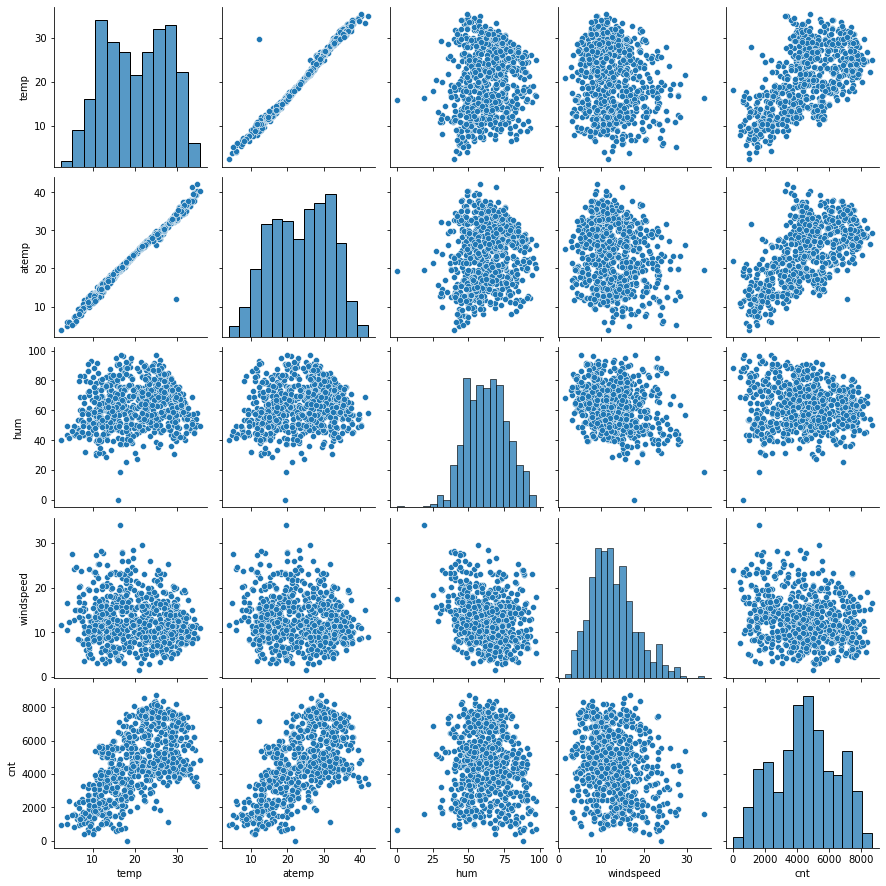

In [18]:
sns.pairplot(data=bshare,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

- temp and atemp seams to have multicollinearity.

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

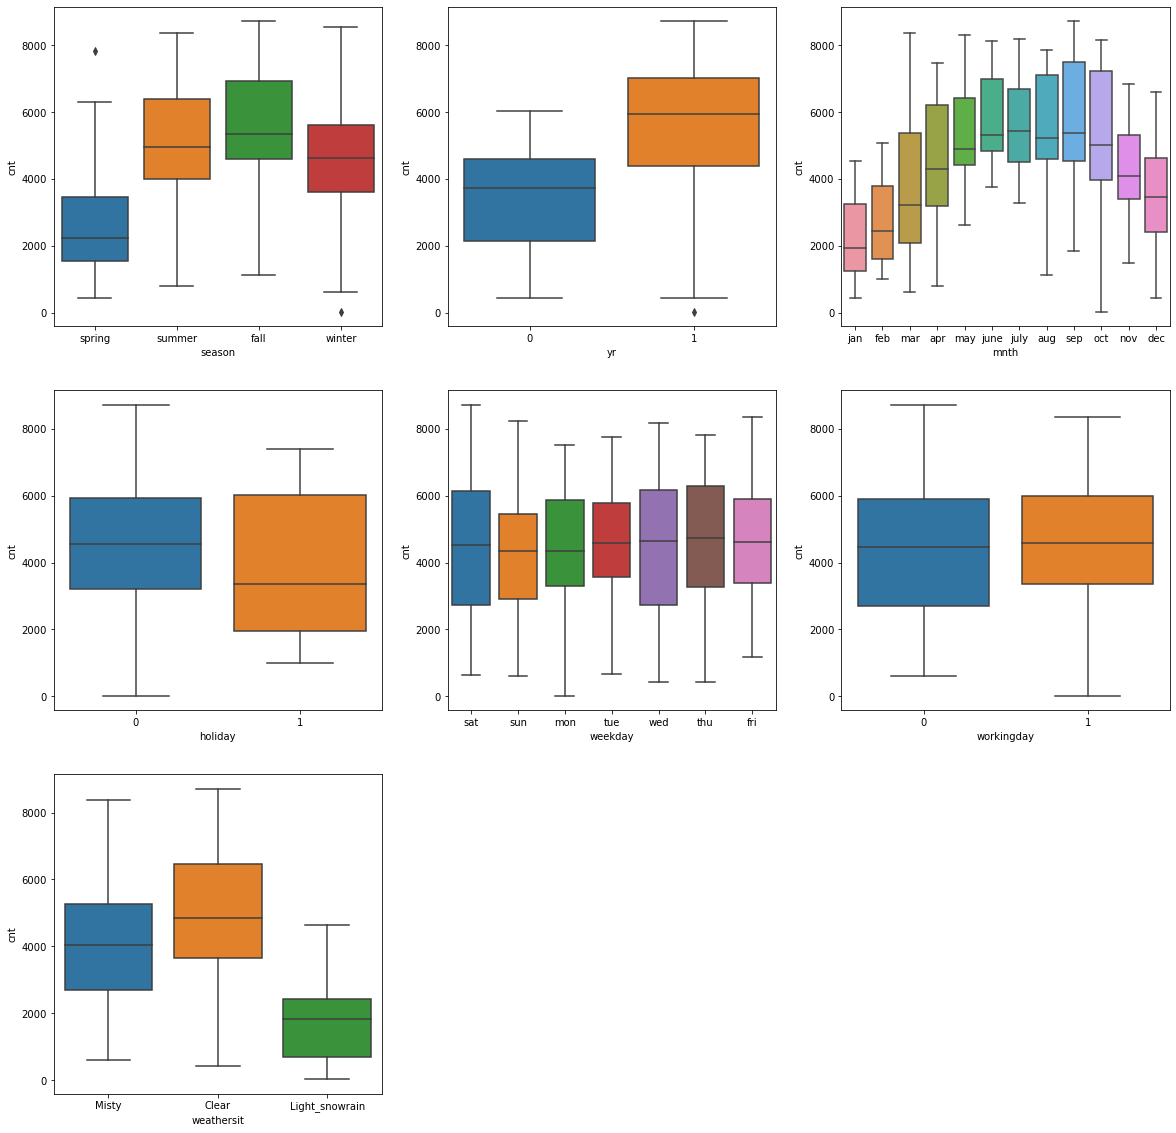

In [19]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bshare)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bshare)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bshare)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bshare)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bshare)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bshare)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bshare)
plt.show()

In [20]:
# function to create barplot related to categorical columns
def plot_bar_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bshare)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bshare, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

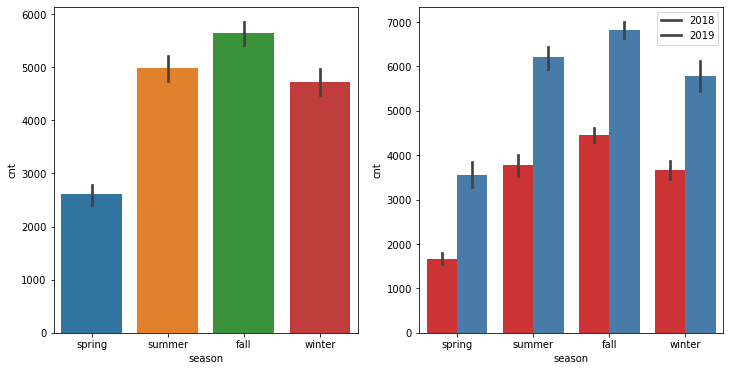

In [21]:
# plotting visualization for season column
plot_bar_columns('season')

Fall season seems to have more booking. Also, in each season the booking has increased from 2018 to 2019.

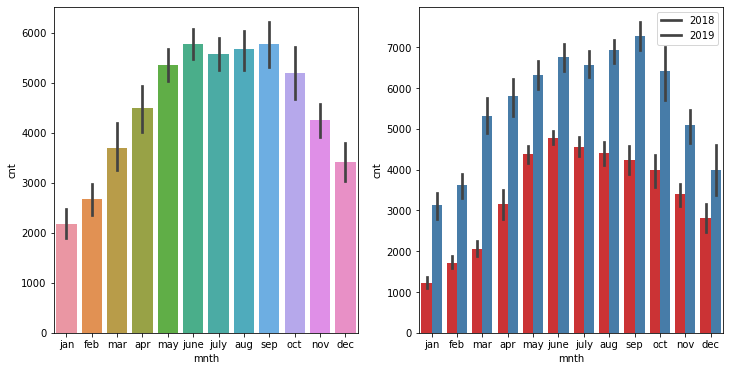

In [22]:
# plotting visualization for month column
plot_bar_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.

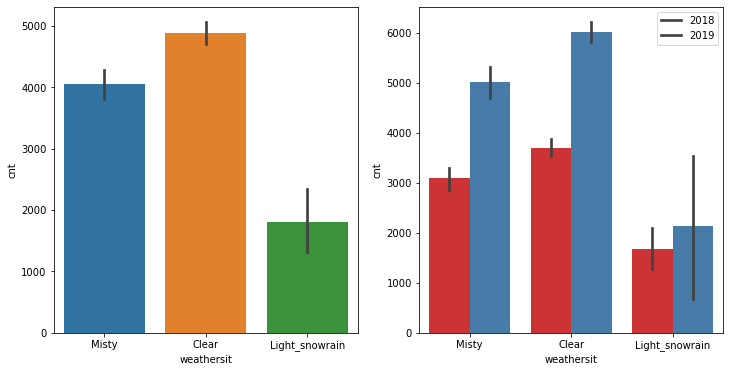

In [23]:
# plotting visualization for weathersit column
plot_bar_columns('weathersit')

Clear weather attracted more booking. Also, in each weather condition the booking has increased from 2018 to 2019.

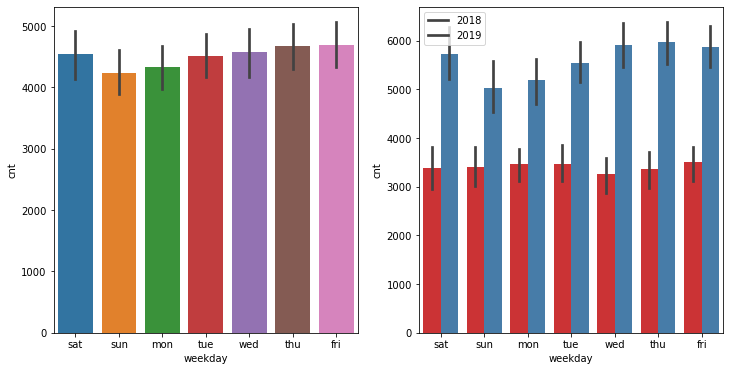

In [24]:
# plotting visualization for weekday column
plot_bar_columns('weekday')

Sun and Mon have comparatively less bookings. But, booking has increased from 2018 to 2019.

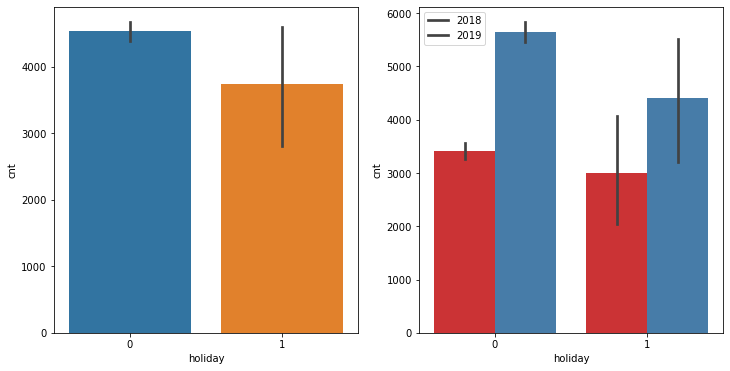

In [25]:
# plotting visualization for holiday column
plot_bar_columns('holiday')

Booking is less on holidays

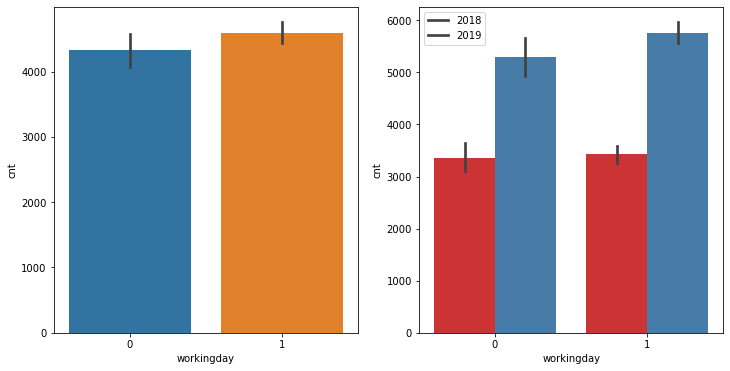

In [26]:
# plotting visualization for workingday column
plot_bar_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

## Step 3: Data Preparation

In [27]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_bshare=pd.get_dummies(bshare.mnth,drop_first=True)
weekdays_bshare=pd.get_dummies(bshare.weekday,drop_first=True)
weathersit_bshare=pd.get_dummies(bshare.weathersit,drop_first=True)
seasons_bshare=pd.get_dummies(bshare.season,drop_first=True)

In [28]:
bshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
# Merging  the dataframe, with the dummy variable dataset. 
bshare_new = pd.concat([bshare,months_bshare,weekdays_bshare,weathersit_bshare,seasons_bshare],axis=1)

In [30]:
bshare_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [31]:
# dropping unnecessary columns as we have already created dummy variable out of it.
bshare_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [32]:
bshare_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [33]:
# check the column info of new dataframe 
bshare_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [157]:
# splitting the dataframe into Train and Test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bshare_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [158]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [159]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [160]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [161]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


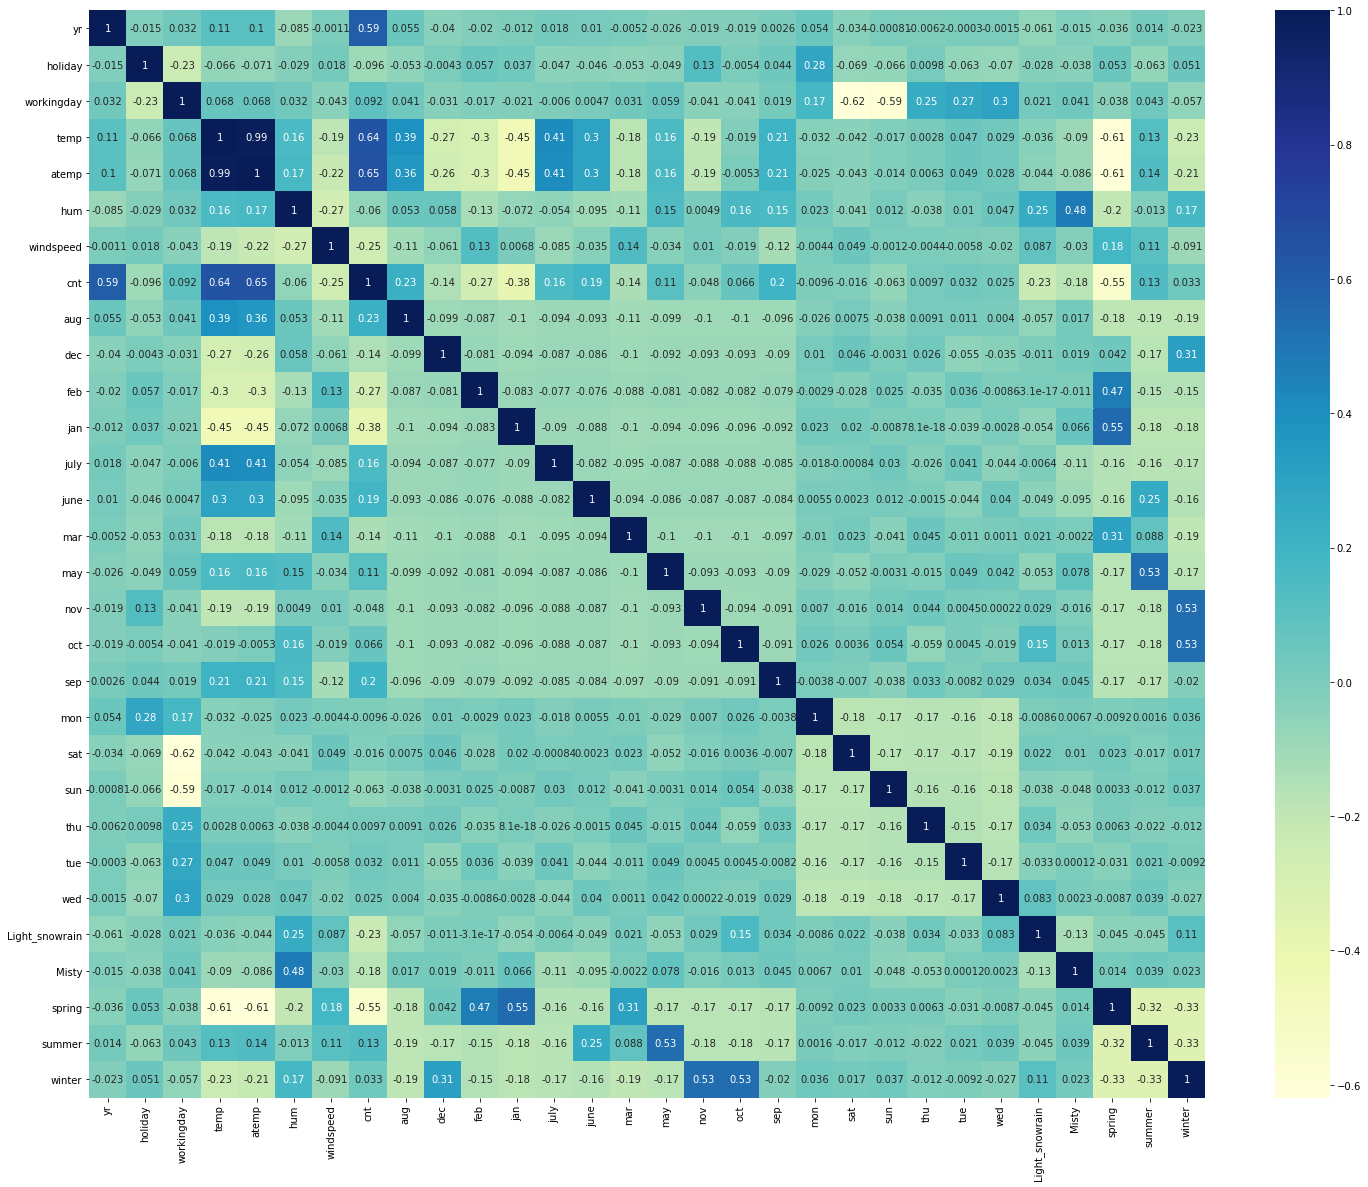

In [162]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It is observed that 'temp' and 'atemp' seems to the correlated to 'cnt the most. 
- 'temp' and 'atemp' has correlation of 0.99.
- As 'atemp' is feeling temperature. It is more likely to effect decision of bike rider.
- So, we can drop 'temp'.

Let's see a pairplot area.

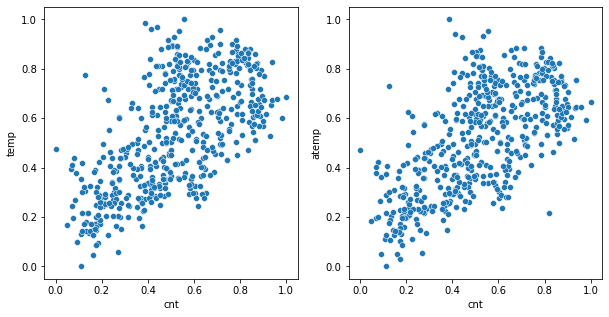

In [163]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(df_train.cnt, df_train.temp)
plt.subplot(1,2,2)
sns.scatterplot(df_train.cnt, df_train.atemp)
plt.show()

In [164]:
# droping 'temp'
df_train = df_train.drop('temp', 1)

### Dividing into X and Y sets for the model building

In [165]:
y_train = df_train.pop('cnt')
X_train = df_train

In [166]:
# Check all the columns of the dataframe
bshare_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [167]:
# Check all the columns of the X_train
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [168]:
X_train.shape

(510, 28)

In [169]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [170]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14)
rfe = rfe.fit(X_train, y_train)

In [171]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1)]

In [172]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'winter'],
      dtype='object')


In [173]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [174]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [175]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [176]:
# dataframe with RFE selected variables

X_train_1 = X_train[col]

In [177]:
# calculate VIF

calculateVIF(X_train_1)

,Features,VIF
2,workingday,40.74
8,sat,9.94
9,sun,9.66
3,atemp,2.92
1,holiday,2.53
12,spring,2.49
4,hum,1.90
13,winter,1.71
11,Misty,1.57
6,july,1.29


'workingday' shows high VIF value.

## Step 5: Building a linear model

In [178]:
# Building 1st linear regression model
import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.45e-188
Time:                        20:31:45   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2449      0.025      9.

In [179]:
# As workingday shows high VIF values hence we can drop it
X_train_2 = X_train_1.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_2)

,Features,VIF
3,hum,23.07
2,atemp,15.29
4,windspeed,3.98
11,spring,2.50
10,Misty,2.25
0,yr,2.05
12,winter,2.04
5,july,1.39
7,sat,1.23
8,sun,1.23


In [180]:
# Building 2nd linear regression model
X_train_lm_2 = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.45e-188
Time:                        20:31:45   Log-Likelihood:                 507.69
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3395      0.031     10.

In [181]:
# We can drop hum variable as it has high VIF
X_train_3 = X_train_2.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_3)

,Features,VIF
2,atemp,4.63
3,windspeed,3.95
0,yr,2.05
10,spring,1.66
9,Misty,1.52
11,winter,1.43
4,july,1.35
6,sat,1.23
7,sun,1.21
5,sep,1.20


In [182]:
# Building 3nd linear regression model
X_train_lm_3 = sm.add_constant(X_train_3)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.02e-186
Time:                        20:31:45   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2598      0.024     10.

In [183]:
# We can drop sat variable as it has high p-value
X_train_4 = X_train_3.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_4)

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,yr,2.05
9,spring,1.65
8,Misty,1.52
10,winter,1.42
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snowrain,1.08


VIF doesnt seems to be affected much after dropping 'sat'.

In [184]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_4)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.12e-187
Time:                        20:31:45   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     498   BIC:                            -923.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2620      0.024     10.

- VIF values are less than 5 which is good

- We can consider the above model i.e lr_4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

- F-Statistics value of 230.5 (which is greater than 1) and the p-value of 2.12e-187 i.e almost equals to zero, states that the overall model is significant.

In [185]:
# Checking the parameters and their coefficient values
lr_4.params

const             0.261986
yr                0.234998
holiday          -0.102816
atemp             0.463225
windspeed        -0.125373
july             -0.065714
sep               0.058742
sun              -0.048395
Light_snowrain   -0.287197
Misty            -0.083654
spring           -0.116698
winter            0.041178
dtype: float64

## Step 7: Residual Analysis of the train data

In [186]:
X_train_lm_4

,const,yr,holiday,atemp,windspeed,july,sep,sun,Light_snowrain,Misty,spring,winter
653,1.0,1,0,0.501133,0.300794,0,0,0,0,0,0,1
576,1.0,1,0,0.766351,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.200348,0.663106,0,0,1,0,0,1,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.762183,0.355596,0,0,0,0,1,0,0
578,1.0,1,0,0.824359,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.218747,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.223544,0.431816,0,0,0,0,1,0,1


In [187]:
y_train_pred = lr_4.predict(X_train_lm_4)

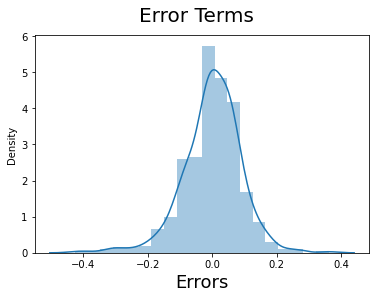

In [188]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

- Error terms are following normal distribution

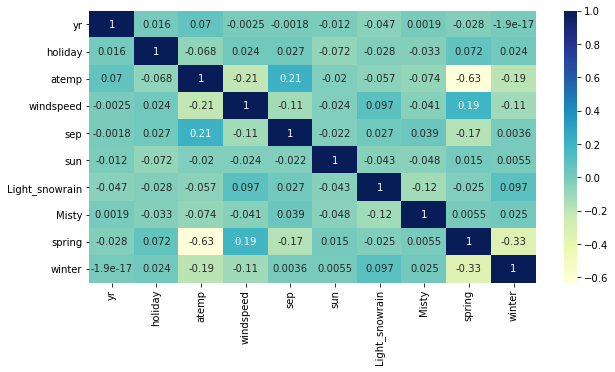

In [189]:
# Let's re-check the correlation coefficients
plt.figure(figsize = (10, 5))
sns.heatmap(X_train_5.corr(), annot = True, cmap="YlGnBu")
plt.show()

- There is no multicolinearity as seen from the heatmap

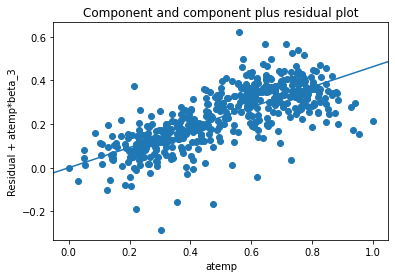

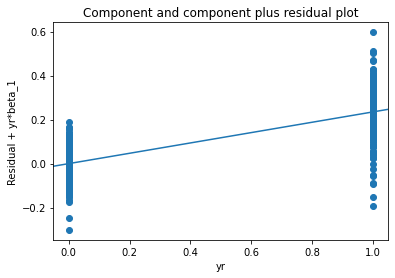

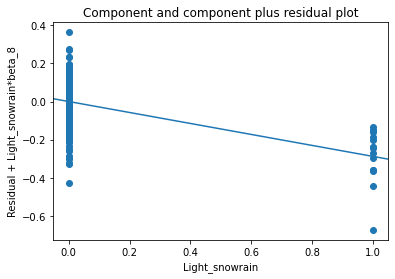

In [190]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_4, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'Light_snowrain')
plt.show()

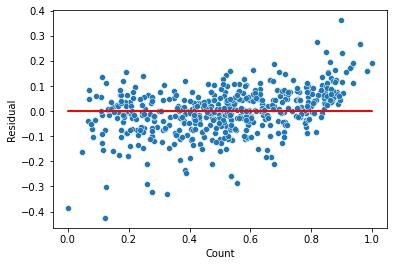

In [191]:
#Homoscedasticity
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- No visible pattern observed from above plot for residuals.

## Step 8: Making Predictions Using the Final Model

In [192]:
# Applying scaling on the test dataset
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [193]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,0,0,1,0,0,0,0,0,1,0


In [194]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [195]:
y_test = df_test.pop('cnt')
X_test = df_test

In [196]:
# Keeping only required columns.
col1 = X_train_4.columns
X_test_new = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test_new)

In [197]:
# Making predictions using the 4th model
y_pred = lr_4.predict(X_test_lm_4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

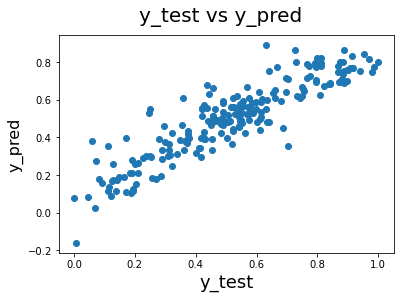

In [198]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                      
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [199]:
# checking R-squared score on test dataframe
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.803

In [200]:
round(lr_4.params,3)

const             0.262
yr                0.235
holiday          -0.103
atemp             0.463
windspeed        -0.125
july             -0.066
sep               0.059
sun              -0.048
Light_snowrain   -0.287
Misty            -0.084
spring           -0.117
winter            0.041
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = 0.262 + 0.235  \times  yr - 0.103  \times  holiday + 0.463 \times atemp - 0.125 \times windspeed - 0.066 \times july + 0.059 \times sep - 0.048 \times sun - 0.287 \times Light_snowrain - 0.084 \times Misty - 0.117 \times spring + 0.041 \times winter $


### Demand of bikes depend on yr, holiday, temp, windspeed, july, sep, sun, Light_snowrain, Misty, spring and winter.

### Top 3 variables are atemp , yr and Light_snowrain